In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv("car_purchasing.csv",encoding='latin-1')

In [51]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [52]:
df = df.drop(["customer name","customer e-mail","country"],axis=1)

In [53]:
df.isnull().sum()

gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    int64  
 1   age                  500 non-null    float64
 2   annual Salary        500 non-null    float64
 3   credit card debt     500 non-null    float64
 4   net worth            500 non-null    float64
 5   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [55]:
df.shape

(500, 6)

In [56]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [58]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

In [73]:
X_train_scale.shape, X_test_scale.shape

((400, 5), (100, 5))

In [81]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(Dense(10,activation='relu',input_dim = 5))
model.add(Dense(1,activation='linear'))

/Users/saee2510/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(X_train_scale,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2109491072.0000 - val_loss: 2213281280.0000
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2084439936.0000 - val_loss: 2213273088.0000
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2040981760.0000 - val_loss: 2213264896.0000
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2086989696.0000 - val_loss: 2213256704.0000
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2044414976.0000 - val_loss: 2213248512.0000
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2047951488.0000 - val_loss: 2213240064.0000
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2012439552.0000 - val_loss: 2213231616.0000
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2086636032.0000 - val_loss: 2213222912.0000
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2092370304.0000 - val_loss: 2213213952.0000
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2073251328.0000 - val_l

In [83]:
## prediction
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [75]:
y_test.shape, y_pred.shape

((100,), (400, 1))

In [84]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

-19.275558122184638

Performance is not that good

Lets upgrade it's architecture

In [92]:
model = Sequential([
    Dense(10,activation = 'relu' , input_dim = 5),
    Dense(15,activation = 'relu' ),
    Dense(1,activation = 'linear' )
])
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')


/Users/saee2510/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

## Tracing Loss

In [95]:
error_tracing = model.fit(X_train , y_train , epochs = 175 , validation_split = 0.2 )

Epoch 1/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4431325696.0000 - val_loss: 2709932800.0000
Epoch 2/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2089044224.0000 - val_loss: 1146300032.0000
Epoch 3/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 804335232.0000 - val_loss: 404493216.0000
Epoch 4/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 273775648.0000 - val_loss: 186818224.0000
Epoch 5/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177462624.0000 - val_loss: 169341472.0000
Epoch 6/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194609168.0000 - val_loss: 171613376.0000
Epoch 7/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206199120.0000 - val_loss: 165879104.0000
Epoch 8/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181519728.0000 - val_loss: 164458688.0000
Epoch 9/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189520288.0000 - val_loss: 165593760.0000
Epoch 10/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170289456.0000 - val_loss: 

Epoch 62/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48469072.0000 - val_loss: 59325748.0000
Epoch 63/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45391708.0000 - val_loss: 55567192.0000
Epoch 64/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43134336.0000 - val_loss: 57333184.0000
Epoch 65/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51183048.0000 - val_loss: 54828084.0000
Epoch 66/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48667420.0000 - val_loss: 55693120.0000
Epoch 67/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45176992.0000 - val_loss: 57508896.0000
Epoch 68/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43410812.0000 - val_loss: 54925620.0000
Epoch 69/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42481544.0000 - val_loss: 56586004.0000
Epoch 70/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44383484.0000 - val_loss: 55119528.0000
Epoch 71/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46167344.0000 - val_loss: 57827980.0000


Epoch 123/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47559764.0000 - val_loss: 56133600.0000
Epoch 124/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41626556.0000 - val_loss: 55235384.0000
Epoch 125/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49264700.0000 - val_loss: 53442416.0000
Epoch 126/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45464048.0000 - val_loss: 57225024.0000
Epoch 127/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48968140.0000 - val_loss: 54221304.0000
Epoch 128/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43844648.0000 - val_loss: 58860512.0000
Epoch 129/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47378336.0000 - val_loss: 53860672.0000
Epoch 130/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44262852.0000 - val_loss: 55354100.0000
Epoch 131/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46215732.0000 - val_loss: 56249152.0000
Epoch 132/175
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54568340.0000 - val_loss: 5284

In [96]:
tr_loss = error_tracing.history['loss']
val_loss = error_tracing.history['val_loss']

## Plotting

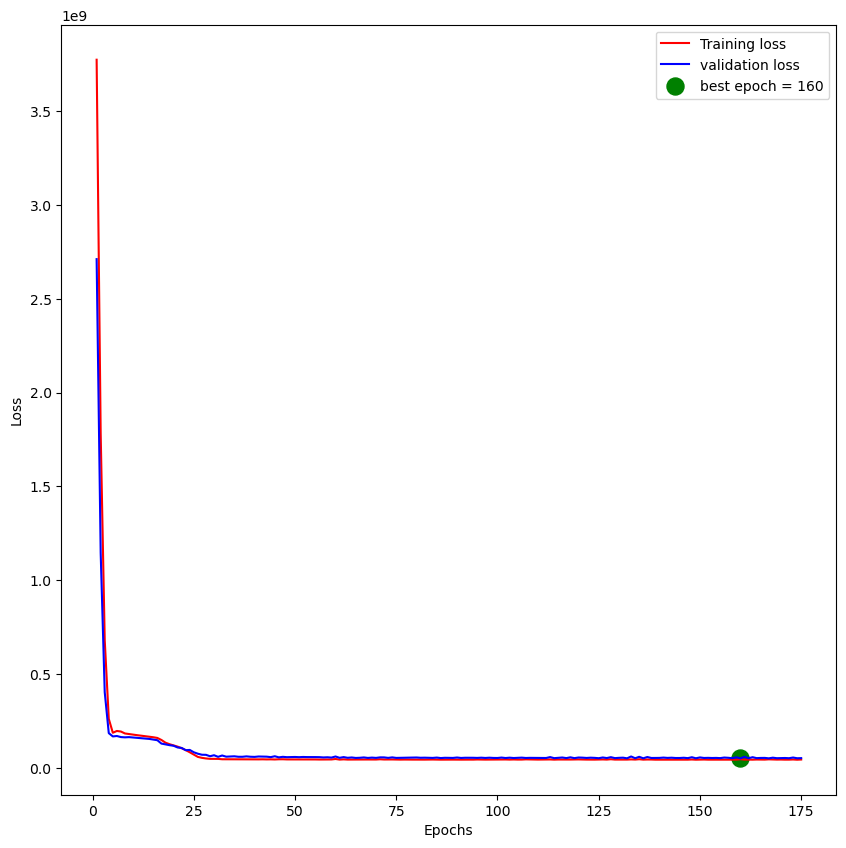

In [97]:
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]

loss_label=f"best epoch = {index_loss+1}"

plt.figure(figsize=(10,10))

plt.plot(Epochs,tr_loss,'r',label='Training loss')
plt.plot(Epochs,val_loss,'b',label='validation loss')

plt.scatter(index_loss + 1 , val_lowest,c='green',s=150,label=loss_label)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [99]:
y_hat = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [100]:
mean_squared_error(y_test,y_hat)

43048583.92077055

In [101]:
r2_score(y_test,y_hat)

0.5462599264093703